# Project: Biodiversity and Conservation in National Parks

In this project I am analyzing data from several U.S. National Parks.  Data for this project is given in species_info.csv and observations.csv.

The data for this project stems from the following national parks:

- Yellowstone National Park
- Great Smoky Mountains National Park
- Bryce National Park
- Yosemite National Park


# Scope:

There are five sections to this project:
- Descriptive Statistics
- Analysis
- Merging The Data
- Analysis of a Specific Species
- Conclusions

# Project Goals:

Questions to be considered in this project:

 - Which species are most prevalant in each park?
 - What is the distribution of observations for each category of species?
 - How does the spread of conservation status vary within each national park?
 - Which species are more likely to be protected than others?
 - Which species are more likely to be at risk?
 - Are the differences between species and their probabilities of conservation significant?
 
# Data Analysis Techniques:

Techniques that will be used in this project:

 - Data visualization through charts and graphs
      - Libraries such as pandas, maplotlib, and seaborn will be utilized.
 - Summary statistics
 - Relationships between different columns in the combined data
 - Observation of species and their statistics in different national parks


In [ ]:
#import all libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

First we will import all of the given .csv data and observe the charts.

# Part I: Descriptive Statistics

In [29]:
# Import all csv data:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')
observations.head()
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [190]:
# Info
print(species_info.info())
print(observations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
 4   protection_status    5824 non-null   bool  
 5   genus                5824 non-null   object
 6   species              5799 non-null   object
 7   animal_class         5824 non-null   object
dtypes: bool(1), object(7)
memory usage: 324.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1

Now, we will compute some of the summary statistics for each of the csv files.

In [226]:
# Summary statistics:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [227]:
species_info.describe()

,category,scientific_name,common_names,conservation_status,protection_status,genus,species,animal_class
count,5824,5824,5824,5824,5824,5824,5799,5824
unique,7,5541,5504,5,2,1595,3106,1708
top,Vascular Plant,Castor canadensis,Brachythecium Moss,No Intervention,False,Carex,canadensis,Moss
freq,4470,3,7,5633,5633,217,53,280


In [4]:
# Find all columns:
print(observations.columns)
print(species_info.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [8]:
# Find all unique values:
print(observations.park_name.unique())
print(species_info.conservation_status.unique())
print(species_info.category.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Now we will visualize the number of national park observations and count of each animal category:

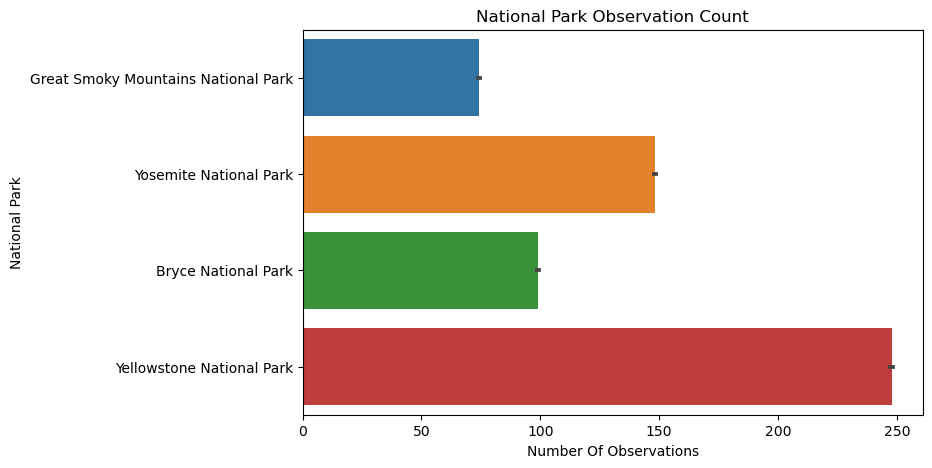

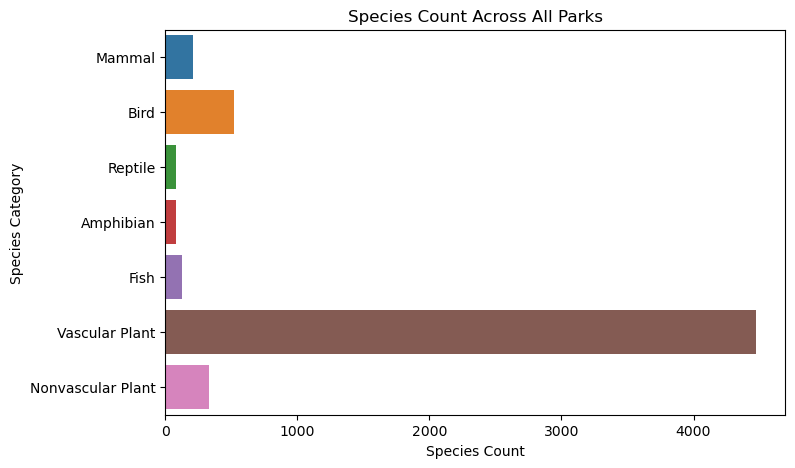

In [228]:

plt.figure(figsize = (8,5))
sns.barplot(y = observations['park_name'], x = observations['observations'])
plt.xlabel('Number Of Observations')
plt.ylabel('National Park')
plt.title('National Park Observation Count')


plt.figure(figsize = (8,5))
sns.countplot(data = species_info, y = species_info['category'])
plt.xlabel('Species Count')
plt.ylabel('Species Category')
plt.title('Species Count Across All Parks')
plt.show()

According to the tables, most of our observations are from Yellowstone National Park, with over 4,000 of the species being vascular plants.

In [30]:
# Now analyze the size of the data:

print('Observations shape: ' + str(observations.shape))
print('Species Info shape: ' + str(species_info.shape))

Observations shape: (23296, 3)
Species Info shape: (5824, 4)


In [31]:
# The observations table is 23,296 rows long, and the species table is 5,824 rows long.
# Find the total number of species:
print(species_info.scientific_name.nunique())

5541


There are 5,541 different species in the given data.

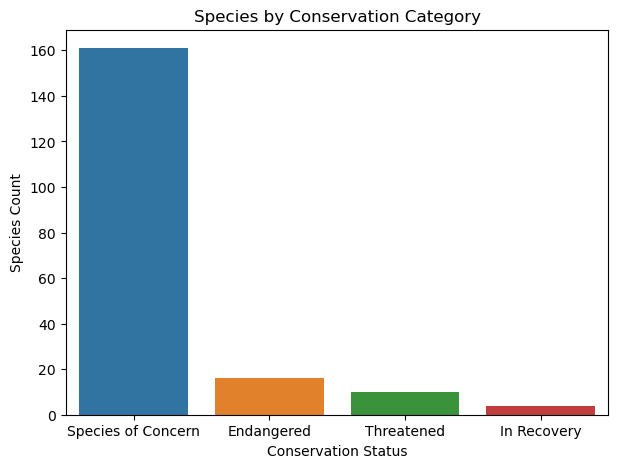

In [33]:
# Find the number of species under each conservation category:
plt.figure(figsize = (7,5))
sns.countplot(x = species_info.conservation_status)
plt.xlabel('Conservation Status')
plt.ylabel('Species Count')
plt.title('Species by Conservation Category')
plt.show()

We know from the above chart that most of the CONSERVED species are labeled as species of concern.

We should now check the total number of observations:

In [36]:
print(observations.observations.sum())

3314739


# Part II: Analysis
Over 3 million observations were made in total across all of the national parks.
Now we will begin analysis: First we need to replace all of the NaN values for the conservation_status column:

In [37]:

species_info.fillna('No Intervention', inplace = True)
species_info.conservation_status.value_counts()

No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

In [187]:
# Percentage of all data that is 'No Intervention'
percentage = 5633 / 5824
percentage

0.9672046703296703

About 97 percent of all organisms in the data are not at risk.  Only 191 species in the data are at risk.

It is best now to see the distribution of which exact categories of species are more endangered than others.

In [55]:

conservation = species_info[species_info.conservation_status != 'No Intervention'].groupby(['category', 'conservation_status'])
conservation.head()


,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
...,...,...,...,...
4597,Amphibian,Anaxyrus canorus,Yosemite Toad,Threatened
4600,Amphibian,Rana draytonii,California Red-Legged Frog,Threatened
4601,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Endangered
4607,Amphibian,Hydromantes platycephalus,Mount Lyell Salamander,Species of Concern


In [57]:
# Now lets create a new column in the chart for species protection:
species_info['protection_status'] = species_info.conservation_status != 'No Intervention'
species_info



,category,scientific_name,common_names,conservation_status,protection_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention,False


In [74]:
# Count each category:
species_counts = species_info.groupby(['category', 'protection_status'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='protection_status',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
species_counts.columns = ['category', 'not_protected', 'protected']
species_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


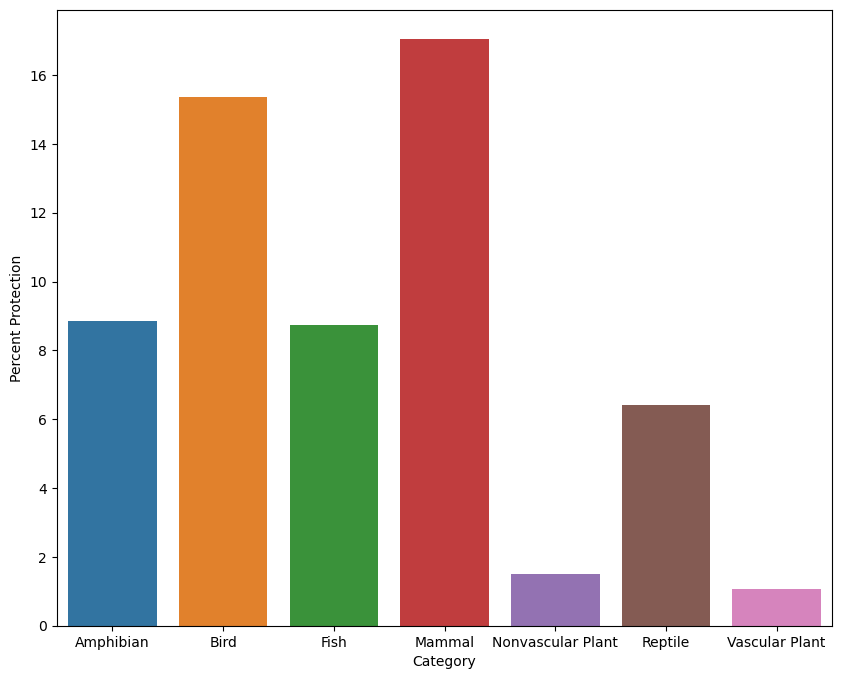

In [189]:
# Calculate the proportion of each species category that is protected:
species_counts['percent_protected'] = species_counts.protected / (species_counts.protected + species_counts.not_protected) * 100
species_counts

plt.figure(figsize = (10, 8))
sns.barplot(x = species_counts.category, y = species_counts.percent_protected)
plt.xlabel('Category')
plt.ylabel('Percent Protection')
plt.show()


The chart above demonstrates that mammals have the highest probability of being protected across all of the national parks, having a protection percentage of 17 percent.

To further organize the data, we will now create new columns in the chart for the genus and species of the organisms.

In [86]:
# Organize the data through the binomial nomenclature of the scientific names column:

split_scientific_names = species_info.scientific_name.str.split(' ')
species_info['genus'] = split_scientific_names.str.get(0)
species_info['species'] = split_scientific_names.str.get(1)


species_info



,category,scientific_name,common_names,conservation_status,protection_status,genus,species
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,Clethrionomys,gapperi
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,Bos,bison
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,Bos,taurus
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,Ovis,aries
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,Cervus,elaphus
...,...,...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention,False,Solanum,parishii
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention,False,Solanum,xanti
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention,False,Parthenocissus,vitacea
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention,False,Vitis,californica


In [94]:
# Find the number of species for each genus:
print('Number of different genus: ' + str(species_info.genus.nunique()))
print('Number of different species: ' + str(species_info.species.nunique()))

Number of different genus: 1595
Number of different species: 3106


# Testing for Statistical Significance in Conservation Status
In this section, we will use the chi2_contingency module from the scipy.stats library to test if there are significant differences in the probabilities of being protected among the different categories of animals from the national parks.

The test will be as follows:
- A significance threshold of 0.05 will be used.
- If the p-value > 0.05, then there is not enough evidence to determine statistical significance.
- If the p-value < 0.05, then there is sufficient evidence to determine statistical significance.


# Test 1:
Now we will analyze for any statistically significant differences in animal protection:

First we will look at two closely related categories: amphibians and reptiles:

In [101]:

test1 = [[72, 7], [73, 5]]
chi2, pval, dof, expected = chi2_contingency(test1)
print('P-value: ' + str(pval))
print('Chi2 statistic: ' + str(chi2))




P-value 0.7814504686518953
Chi2 statistic 0.07696702910310493


# Test 2
From the above statistics it shows that amphibians and reptiles are not statistically significantly different in terms of their likelihood of being protected.

Next we will analyze mammals and birds:

In [102]:

test2 = [[146, 30], [413, 75]]
chi2, pval, dof, expected = chi2_contingency(test2)
print('P-value: ' + str(pval))
print('Chi2 statistic: ' + str(chi2))

P-value: 0.6875948096661336
Chi2 statistic: 0.16170148316545574


# Test 3
By using a significance threshold of 0.05, a p-value of 0.68 shows that there are no statistically significant differences in the likelihood of mammals and birds having drastically different chances of being protected.

Next we will analyze mammals and reptiles:

In [103]:

test3 = [[146, 30], [73, 5]]
chi2, pval, dof, expected = chi2_contingency(test3)
print('P-value: ' + str(pval))
print('Chi2 statistic: ' + str(chi2))

P-value: 0.03835559022969898
Chi2 statistic: 4.289183096203645


# Test 4

Now we have found a p-value that is less than our significance threshold: 0.038

This proves that mammals are significantly more likely to be protected as compared to reptiles.

Next we will analyze vascular and non-vascular plants:

In [104]:

test4 = [[328, 5], [4216, 46]]
chi2, pval, dof, expected = chi2_contingency(test4)
print('P-value: ' + str(pval))
print('Chi2 statistic: ' + str(chi2))

P-value: 0.6623419491381985
Chi2 statistic: 0.19069121233812064


# Test 5
Although two different types of plants, the p-value shows that they are not significantly different in their odds of being protected.

Finally, we will analyze birds and fish:

In [105]:

test5 = [[413, 75], [113, 11]]
chi2, pval, dof, expected = chi2_contingency(test5)
print('P-value: ' + str(pval))
print('Chi2 statistic: ' + str(chi2))

P-value: 0.08643464062403323
Chi2 statistic: 2.9395531637849306


Although this p-value is close to our significance threshold, it is not small enough to conclude a significant difference in the odds of fish and birds being protected.

However, we can still claim that this difference is greater than those of some of the other tests, mainly because of the lower p-value.

Now we will group together all of the park observations:

Before doing so, we need to make sure there are no indeterminate values:

In [115]:
observations.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

# Part III: Merging the Data
There are no indeterminate values in the data. 

Now combine both the observations and the species data.

In [116]:

all_data = pd.merge(observations, species_info)
all_data

,scientific_name,park_name,observations,category,common_names,conservation_status,protection_status,genus,species,animal_class
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,Vicia,benghalensis,Vetch
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,Vicia,benghalensis,Vetch
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,Vicia,benghalensis,Vetch
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,Vicia,benghalensis,Vetch
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False,Neovison,vison,Mink
...,...,...,...,...,...,...,...,...,...,...
25627,Gulo gulo,Yosemite National Park,157,Mammal,Wolverine,No Intervention,False,Gulo,gulo,Wolverine
25628,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vascular Plant,"Green Panic-Grass, Panic Grass",No Intervention,False,Dichanthelium,depauperatum,Grass
25629,Dichanthelium depauperatum,Bryce National Park,80,Vascular Plant,"Green Panic-Grass, Panic Grass",No Intervention,False,Dichanthelium,depauperatum,Grass
25630,Dichanthelium depauperatum,Yellowstone National Park,255,Vascular Plant,"Green Panic-Grass, Panic Grass",No Intervention,False,Dichanthelium,depauperatum,Grass


In [231]:
all_data.describe()

,observations
count,25632.000000
mean,142.214693
std,69.912475
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


Now we wish to visualize the proportions of species that have are protected under different circumstances.

In [137]:
protections_by_park = all_data.groupby(['park_name', 'conservation_status']).observations.sum().reset_index()
protections_by_park

,park_name,conservation_status,observations
0,Bryce National Park,Endangered,619
1,Bryce National Park,In Recovery,388
2,Bryce National Park,No Intervention,614682
3,Bryce National Park,Species of Concern,17011
4,Bryce National Park,Threatened,591
5,Great Smoky Mountains National Park,Endangered,393
6,Great Smoky Mountains National Park,In Recovery,248
7,Great Smoky Mountains National Park,No Intervention,462047
8,Great Smoky Mountains National Park,Species of Concern,11735
9,Great Smoky Mountains National Park,Threatened,440


We will now create a chart to visualize these above statistics:

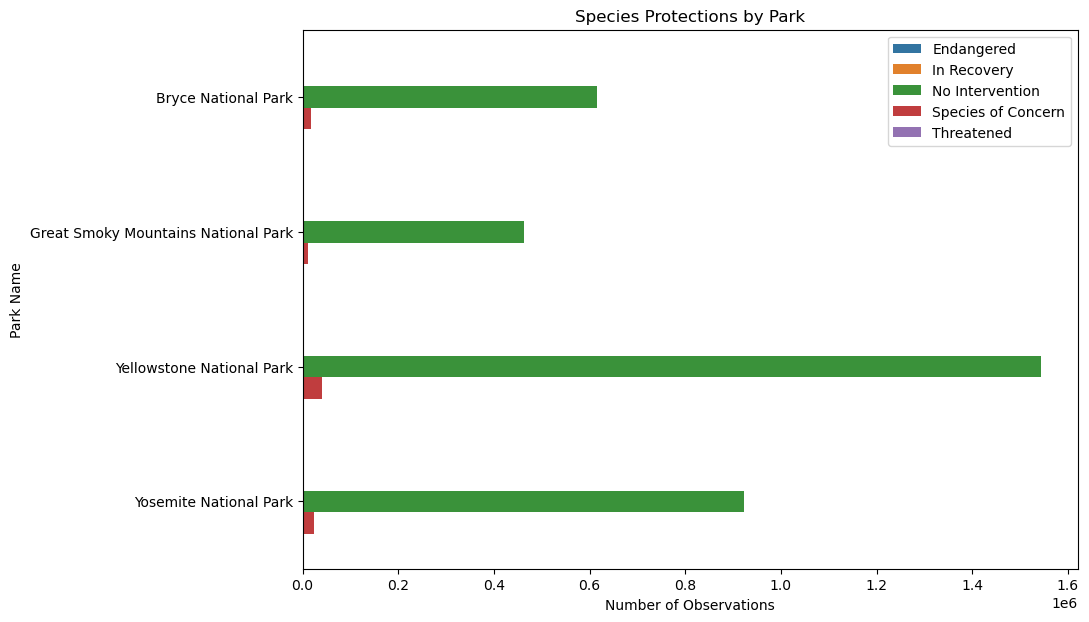

In [146]:
plt.figure(figsize = (10,7))
sns.barplot(data = protections_by_park, y = protections_by_park.park_name, x = protections_by_park.observations, hue = protections_by_park.conservation_status)
plt.legend()
plt.title('Species Protections by Park')
plt.xlabel('Number of Observations')
plt.ylabel('Park Name')
plt.show()

According to the above chart, Yellowstone National Park has the highest number of species that are labeled 'Species of Concern'.  Also, Yellowstone National Park has the highest number of observations of all of the parks in the data.

With all of the data merged, here is a more detailed analysis of all of the observations across the national park:

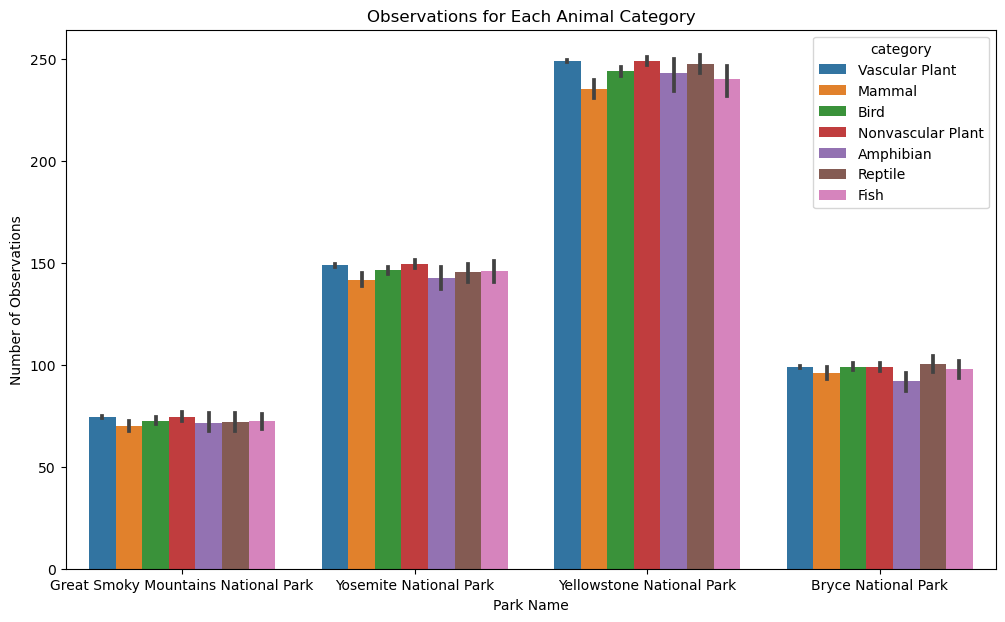

In [219]:
# Observations per national park:
plt.figure(figsize = (12, 7))
sns.barplot(x = all_data.park_name, y = all_data.observations, hue = all_data.category)
plt.ylabel('Number of Observations')
plt.xlabel('Park Name')
plt.title('Observations for Each Animal Category')
plt.show()

A more effective visualization of the conservation status can be executed through a violin plot:

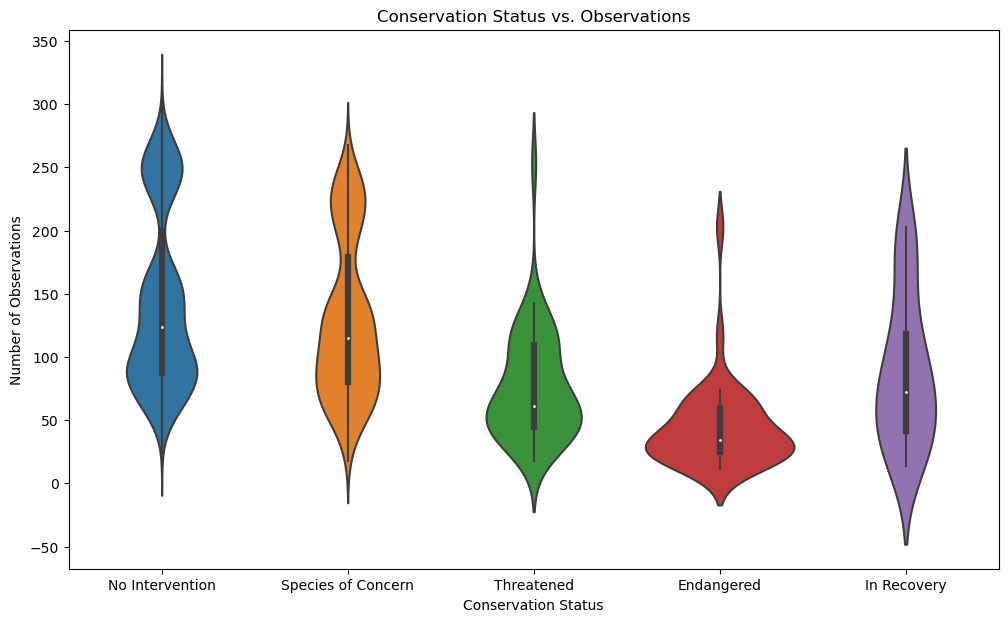

In [223]:
plt.figure(figsize = (12, 7))
sns.violinplot(x = all_data.conservation_status, y = all_data.observations)
plt.xlabel('Conservation Status')
plt.ylabel('Number of Observations')
plt.title('Conservation Status vs. Observations')
plt.show()

Here we can visualize the density and distribution of the observations for each conservation status.

Now, with the data merged, we can also the conservation status of each species category, including the total count.

# Part IV: Analysis of a Specific Species
In this specific project, we will specifically analyze the statistics of sheep.

With the development of these industrial breeds came economic pressure on farmers to abandon their traditional breeds, and many of these have recently become extinct as a result. 

This means that genetic resources in farm animals, especially sheep, are highly endangered particularly in developed countries.

Therefore, it is considered to be a near threatened species.

In [191]:
# Locate sheep data:
all_data['is_sheep'] =  all_data.common_names.apply(lambda x: 'Sheep' in x)
all_data.head(10)

,scientific_name,park_name,observations,category,common_names,conservation_status,protection_status,genus,species,animal_class,is_bison,is_otter,is_bird,is_wolf,is_fox,is_bat,is_sheep
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,Vicia,benghalensis,Vetch,False,False,False,False,False,False,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,Vicia,benghalensis,Vetch,False,False,False,False,False,False,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,Vicia,benghalensis,Vetch,False,False,False,False,False,False,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,Vicia,benghalensis,Vetch,False,False,False,False,False,False,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False,Neovison,vison,Mink,False,False,False,False,False,False,False
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink,No Intervention,False,Neovison,vison,Mink,False,False,False,False,False,False,False
6,Neovison vison,Bryce National Park,91,Mammal,American Mink,No Intervention,False,Neovison,vison,Mink,False,False,False,False,False,False,False
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink,No Intervention,False,Neovison,vison,Mink,False,False,False,False,False,False,False
8,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention,False,Prunus,subcordata,Plum,False,False,False,False,False,False,False
9,Prunus subcordata,Yellowstone National Park,217,Vascular Plant,Klamath Plum,No Intervention,False,Prunus,subcordata,Plum,False,False,False,False,False,False,False


In [192]:
all_data[all_data.is_sheep].head(15)

,scientific_name,park_name,observations,category,common_names,conservation_status,protection_status,genus,species,animal_class,is_bison,is_otter,is_bird,is_wolf,is_fox,is_bat,is_sheep
188,Festuca filiformis,Great Smoky Mountains National Park,79,Vascular Plant,Fineleaf Sheep Fescue,No Intervention,False,Festuca,filiformis,Fescue,False,False,False,False,False,False,True
189,Festuca filiformis,Yellowstone National Park,240,Vascular Plant,Fineleaf Sheep Fescue,No Intervention,False,Festuca,filiformis,Fescue,False,False,False,False,False,False,True
190,Festuca filiformis,Bryce National Park,68,Vascular Plant,Fineleaf Sheep Fescue,No Intervention,False,Festuca,filiformis,Fescue,False,False,False,False,False,False,True
191,Festuca filiformis,Yosemite National Park,177,Vascular Plant,Fineleaf Sheep Fescue,No Intervention,False,Festuca,filiformis,Fescue,False,False,False,False,False,False,True
900,Rumex paucifolius,Great Smoky Mountains National Park,86,Vascular Plant,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,Rumex,paucifolius,Dock,False,False,False,False,False,False,True
901,Rumex paucifolius,Yosemite National Park,120,Vascular Plant,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,Rumex,paucifolius,Dock,False,False,False,False,False,False,True
902,Rumex paucifolius,Bryce National Park,105,Vascular Plant,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,Rumex,paucifolius,Dock,False,False,False,False,False,False,True
903,Rumex paucifolius,Yellowstone National Park,255,Vascular Plant,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,Rumex,paucifolius,Dock,False,False,False,False,False,False,True
2804,Rumex acetosella,Yellowstone National Park,234,Vascular Plant,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,Rumex,acetosella,Sorrell,False,False,False,False,False,False,True
2805,Rumex acetosella,Yellowstone National Park,234,Vascular Plant,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,Rumex,acetosella,Sorrel,False,False,False,False,False,False,True


The sheep data and their observations will now be merged:

In [193]:
all_data[all_data.is_sheep]

,scientific_name,park_name,observations,category,common_names,conservation_status,protection_status,genus,species,animal_class,is_bison,is_otter,is_bird,is_wolf,is_fox,is_bat,is_sheep
188,Festuca filiformis,Great Smoky Mountains National Park,79,Vascular Plant,Fineleaf Sheep Fescue,No Intervention,False,Festuca,filiformis,Fescue,False,False,False,False,False,False,True
189,Festuca filiformis,Yellowstone National Park,240,Vascular Plant,Fineleaf Sheep Fescue,No Intervention,False,Festuca,filiformis,Fescue,False,False,False,False,False,False,True
190,Festuca filiformis,Bryce National Park,68,Vascular Plant,Fineleaf Sheep Fescue,No Intervention,False,Festuca,filiformis,Fescue,False,False,False,False,False,False,True
191,Festuca filiformis,Yosemite National Park,177,Vascular Plant,Fineleaf Sheep Fescue,No Intervention,False,Festuca,filiformis,Fescue,False,False,False,False,False,False,True
900,Rumex paucifolius,Great Smoky Mountains National Park,86,Vascular Plant,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,Rumex,paucifolius,Dock,False,False,False,False,False,False,True
901,Rumex paucifolius,Yosemite National Park,120,Vascular Plant,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,Rumex,paucifolius,Dock,False,False,False,False,False,False,True
902,Rumex paucifolius,Bryce National Park,105,Vascular Plant,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,Rumex,paucifolius,Dock,False,False,False,False,False,False,True
903,Rumex paucifolius,Yellowstone National Park,255,Vascular Plant,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,Rumex,paucifolius,Dock,False,False,False,False,False,False,True
2804,Rumex acetosella,Yellowstone National Park,234,Vascular Plant,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,Rumex,acetosella,Sorrell,False,False,False,False,False,False,True
2805,Rumex acetosella,Yellowstone National Park,234,Vascular Plant,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,Rumex,acetosella,Sorrel,False,False,False,False,False,False,True


In [194]:
# Define sheep species:
all_sheep = all_data[(all_data.is_sheep) & (all_data.category == 'Mammal')]
all_sheep

,scientific_name,park_name,observations,category,common_names,conservation_status,protection_status,genus,species,animal_class,is_bison,is_otter,is_bird,is_wolf,is_fox,is_bat,is_sheep
19224,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
19225,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
19226,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
19227,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
19956,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
19957,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
19958,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
19959,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
25224,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,Ovis,aries,(Feral),False,False,False,False,False,False,True
25225,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,Ovis,aries,(Feral),False,False,False,False,False,False,True


In [196]:
# Merge sheep data:
sheep_complete = pd.merge(all_sheep, observations)
sheep_complete

,scientific_name,park_name,observations,category,common_names,conservation_status,protection_status,genus,species,animal_class,is_bison,is_otter,is_bird,is_wolf,is_fox,is_bat,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,Ovis,canadensis,Sheep,False,False,False,False,False,False,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,Ovis,aries,(Feral),False,False,False,False,False,False,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,Ovis,aries,(Feral),False,False,False,False,False,False,True


Now we will investigate how many sheep observations have been made in each of the given national parks:

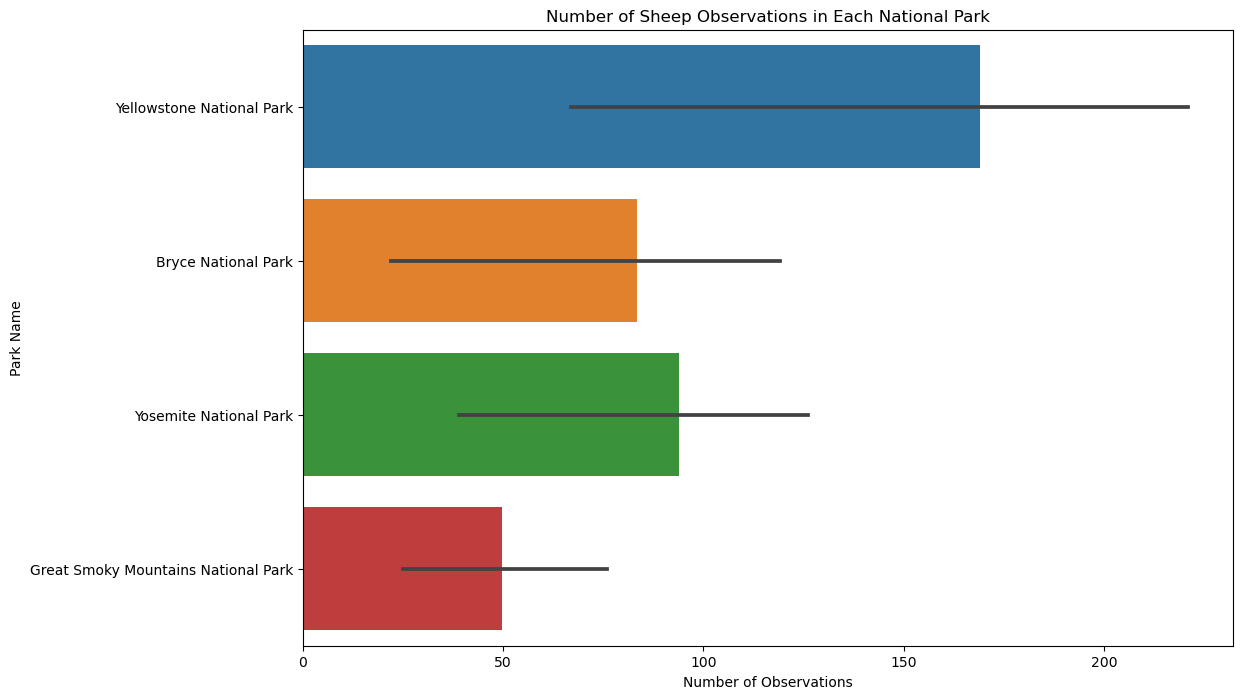

In [198]:
plt.figure(figsize = (12, 8))
sns.barplot(y = sheep_complete.park_name, x = sheep_complete.observations)
plt.title('Number of Sheep Observations in Each National Park')
plt.xlabel('Number of Observations')
plt.ylabel('Park Name')
plt.show()

As concurrent with the observation count for all species across all national parks (see part I), Yellowstone National Park contains the most sheep observations across all four of the national parks.

At this time, it is best to visualize the distribution of protection and conservation status across all of the sheep in these national parks.

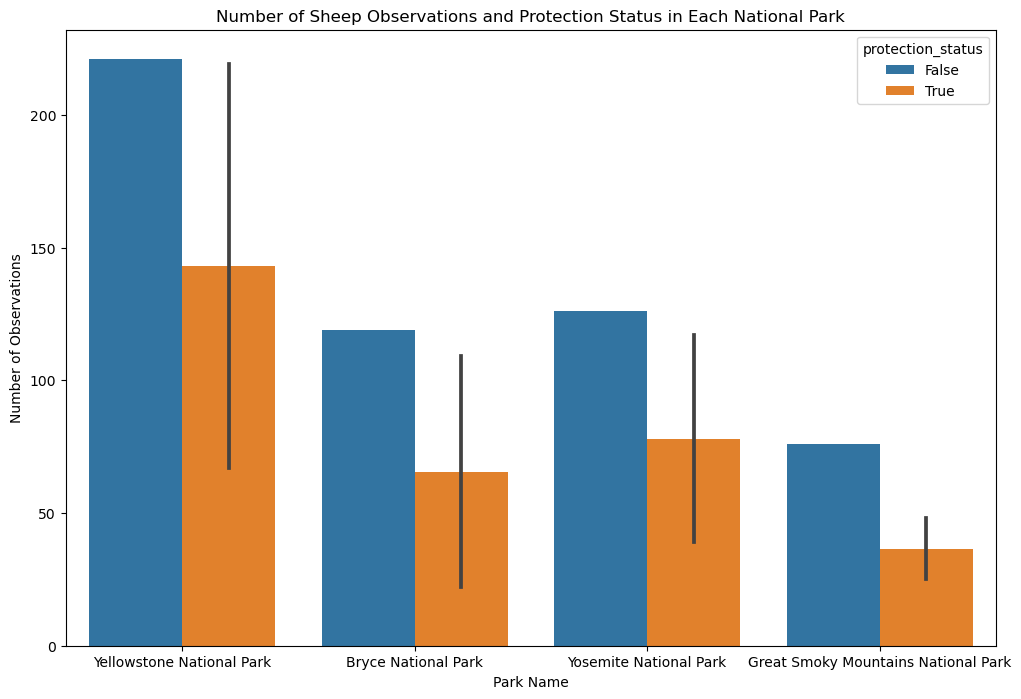

In [210]:
# Protection status
plt.figure(figsize = (12, 8))
sns.barplot(x = sheep_complete.park_name, y = sheep_complete.observations, hue = sheep_complete.protection_status)
plt.title('Number of Sheep Observations and Protection Status in Each National Park')
plt.ylabel('Number of Observations')
plt.xlabel('Park Name')

plt.show()

According to the chart, it is evident that most of the sheep across all four national parks were not protected.  As expected, however, most of the protected sheep reside in Yellowstone National Park.

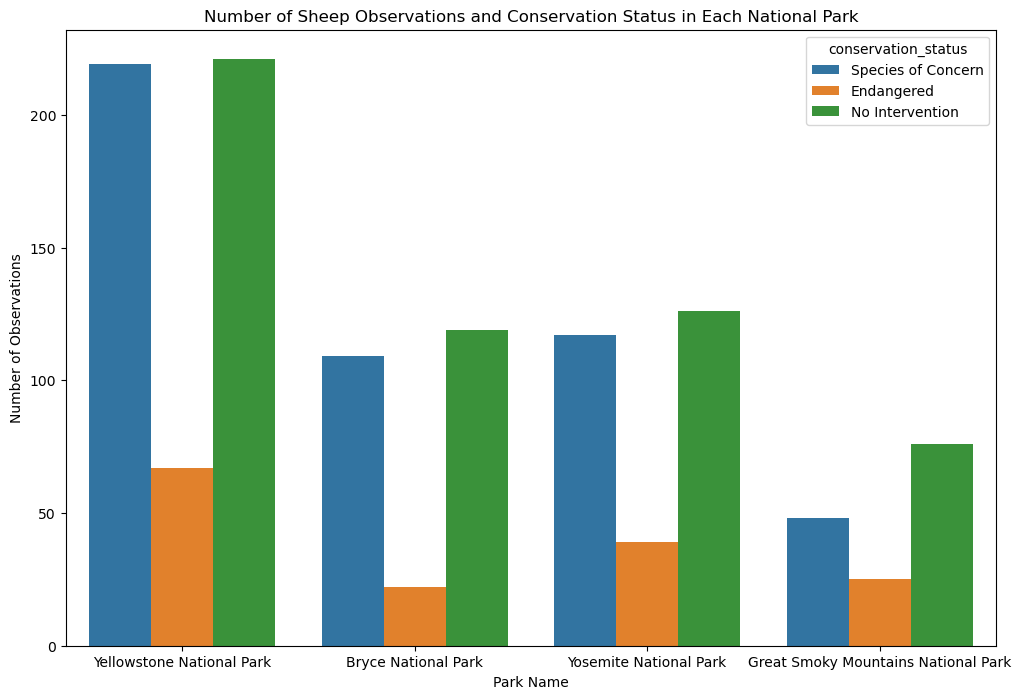

In [211]:
# Conservation status
plt.figure(figsize = (12, 8))
sns.barplot(x = sheep_complete.park_name, y = sheep_complete.observations, hue = sheep_complete.conservation_status)
plt.title('Number of Sheep Observations and Conservation Status in Each National Park')
plt.ylabel('Number of Observations')
plt.xlabel('Park Name')

plt.show()

It appears that Yellowstone National Park has the least intervention for sheep species, however that park hosts most of the endangered sheep species from the data, as well as most of the sheep species of concern.

# Part V: Conclusions

Part I Overview:

- Most of the organisms that were captured through observations across all four of the national parks were vascular plants (over 4,000).
- Yellowstone National Park had the most observations compared to the other national parks.
- There were 5,541 different species in the data.
- Of all of the species that were at risk, most of the species were labeled as 'species of concern.'

Part II Overview:

- 97 percent of all of the species in the data were labeled as 'No Intervention', meaning that only 3 percent of species were at risk.
- The mammal and bird categories of species were the most likely to be protected, with plants being the least likely.
- The genus and species could be separated based on the scientific_name column in the data, in which the column included the binomial nomenclature of the species.
- Mammals and reptiles are statistically significant in which mammals are much more likely to be protected than reptiles.

Part III overview:

- Yellowstone National Park has the most species of concern as well as the most species observations overall.

Part IV overview:

- Most of the sheep observations came from Yellowstone National Park.
- Yellowstone contained most of the protected sheep species, as well as most of the endangered sheep species.  
- Yellowstone had the least intervention for sheep species.
